# Multi-layer Perceptron (MLP)

O Multi-layer Perceptron (MLP) é uma classe de redes neurais artificiais que consiste em múltiplas camadas de neurônios, incluindo uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada neurônio em uma camada está conectado a todos os neurônios na camada subsequente, formando uma arquitetura de rede feedforward.

## Arquitetura:
- **Camada de Entrada:** Recebe os dados de entrada e repassa para a primeira camada oculta.

- **Camadas Ocultas:** Consistem em neurônios que aplicam transformações lineares e não lineares aos dados de entrada. Cada neurônio recebe entradas ponderadas das camadas anteriores, aplica uma função de ativação e passa o resultado para a próxima camada.

- **Camada de Saída:** Gera as previsões finais. A estrutura e o número de neurônios nesta camada dependem do tipo de problema (classificação, regressão, etc.).

## Funções de Ativação:
As funções de ativação são usadas em cada neurônio para introduzir não linearidades na rede, permitindo que ela aprenda padrões complexos nos dados. Aqui estão algumas das funções de ativação comumente usadas:

- **Linear:** $f(x) = x$
    - A função linear é simplesmente uma função identidade que retorna a entrada sem modificação. Ela é usada principalmente na camada de saída para problemas de regressão.

- **Logística (Sigmoid):** $f(x) = \frac{1}{1 + e^{-x}}$
    - A função logística (ou sigmoid) mapeia os valores de entrada para o intervalo [0, 1]. É útil em problemas de classificação binária, onde a saída representa a probabilidade de pertencer a uma classe.

- **Tangente Hiperbólica (Tanh):** $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
    - A função tangente hiperbólica (tanh) é semelhante à função sigmoid, mas mapeia os valores de entrada para o intervalo [-1, 1]. Ela é frequentemente usada em camadas ocultas de redes neurais.

- **ReLU (Rectified Linear Unit):** $f(x) = \max(0, x)$
    - A função ReLU é uma função de ativação não linear que retorna zero para valores negativos e a entrada para valores positivos. Ela é amplamente usada em camadas ocultas de redes neurais devido à sua simplicidade e eficácia.

## Treinamento:
O treinamento de um MLP envolve a atualização iterativa dos pesos das conexões entre os neurônios para minimizar uma função de perda (loss function) que quantifica o erro entre as previsões do modelo e os rótulos reais. Isso é geralmente feito utilizando técnicas de otimização, como o gradiente descendente e suas variantes.

## Implementação no scikit-learn:
O MLPClassifier do scikit-learn é uma implementação eficiente e fácil de usar de um MLP para tarefas de classificação. Ele permite configurar a arquitetura da rede, incluindo o número de camadas e neurônios, as funções de ativação, o algoritmo de otimização e outros hiperparâmetros.

# Parâmetros do `MLPClassifier` e `MlPRegressor` do scikit-learn:

1. `hidden_layer_sizes`: Determina a arquitetura da rede neural, especificando o número de neurônios em cada camada oculta. Pode ser uma tupla onde cada elemento representa o número de neurônios em uma camada específica.

2. `activation`: Define a função de ativação para as camadas ocultas. As opções incluem "relu" (Rectified Linear Unit), "tanh" (tangente hiperbólica) e "logistic" (função logística).

3. `solver`: O otimizador usado para treinar a rede neural. Opções comuns incluem "adam", "lbfgs" e "sgd".

4. `alpha`: Parâmetro de regularização que controla a penalização da magnitude dos pesos da rede para evitar overfitting.

5. `batch_size`: Tamanho do mini-lote usado durante o treinamento da rede. Isso determina quantos exemplos de treinamento são usados antes de atualizar os pesos da rede.

6. `learning_rate`: Determina como a taxa de aprendizagem é adaptada durante o treinamento. Pode ser constante ("constant"), adaptativa ("adaptive") ou inversa da escala do gradiente ("invscaling").

7. `learning_rate_init`: A taxa de aprendizagem inicial. Define a taxa na qual os pesos da rede são atualizados durante o treinamento.

8. `power_t`: O expoente para a inversão da escala de aprendizado.

9. `max_iter`: O número máximo de iterações (épocas) durante o treinamento da rede.

10. `shuffle`: Se os dados de treinamento devem ser embaralhados em cada iteração durante o treinamento.

11. `random_state`: Determina a semente usada pelo gerador de números aleatórios para garantir que os resultados sejam reproduzíveis.

12. `tol`: Tolerância para a convergência do otimizador.

13. `verbose`: Se a saída detalhada deve ser impressa durante o treinamento.

14. `warm_start`: Se o treinamento deve começar a partir dos pesos anteriores.

15. `momentum`: A taxa de momento usada pelo otimizador.

16. `nesterovs_momentum`: Se o momento de Nesterov deve ser usado.

17. `early_stopping`: Se o treinamento deve parar quando a perda de validação não melhorar.

18. `validation_fraction`: A fração dos dados de treinamento a serem reservados como conjunto de validação para a parada antecipada.

19. `beta_1`: O parâmetro de decaimento do momento para o otimizador Adam.

20. `beta_2`: O parâmetro de decaimento do momento para o otimizador Adam.

21. `epsilon`: O valor de ajuste para evitar a divisão por zero no otimizador Adam.

Importando bibliotecas

In [1]:
import gsidiag as gd
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import confusion_matrix, classification_report

from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd

from itertools import combinations
from itertools import cycle
import seaborn as sns



Definindo parâmetros para o uso do readDiag

In [3]:
#DIRdiag = "/home/patrick/readDiag/data"
DIRdiag = "/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout"
#D:\ftp1.cptec.inpe.br\pesquisa\das\joao.gerd\EXP18\GSI\dataout
varName = "amsua"
varType = "n15"
dateIni="2020010100" 
dateFin="2020010506" 
nHour = "6"          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = None           
SingleL = "All" 

datei = datetime.strptime(str(dateIni), "%Y%m%d%H")
datef = datetime.strptime(str(dateFin), "%Y%m%d%H")
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq="6H").tolist()]

print(dates)


['2020010100', '2020010106', '2020010112', '2020010118', '2020010200', '2020010206', '2020010212', '2020010218', '2020010300', '2020010306', '2020010312', '2020010318', '2020010400', '2020010406', '2020010412', '2020010418', '2020010500', '2020010506']


Encontrando e listando arquivos para serem usados

In [4]:
paths, pathsc = [], []

OuterL = "01"        
[paths.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterL+"."+dt) for dt in dates]

OuterLc = "03"
[pathsc.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterLc+"."+dt) for dt in dates]

print(paths)
print("")
print(pathsc)

['/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010212/diag_amsua_n15_01.2020010212', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010218/diag_amsua_n15_01.2020010218', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010300/diag_amsua_n15_01.2020010300', '/mnt/d/f

Lendo arquivos listado usando o readDiag e concatenando os dados

In [5]:
# Define uma variável booleana 'read' como True para indicar que a leitura dos arquivos será realizada
read = True

# Verifica se 'read' é True para prosseguir com a leitura dos arquivos
if read:        
    # Inicializa uma lista vazia para armazenar os objetos gdf
    gdf_list = []
    # Imprime uma mensagem informando o tempo estimado necessário para a leitura dos arquivos
    print("")
    print("Aguarde, o tempo total estimado para a leitura dos arquivos é de "+
          str(int((float(len(paths))*20 )/60))+" minutos e "+
          str(int((float(len(paths))*20 )%60))+" segundos.")
    print("")
    # Itera sobre os caminhos dos arquivos e seus caminhos de configuração correspondentes
    for path, pathc in zip(paths,pathsc):
        # Imprime uma mensagem indicando o arquivo que está sendo lido
        print("Reading "+path)
        # Lê o arquivo usando a função read_diag do módulo gsidiag e armazena o objeto retornado em gdf
        gdf = gd.read_diag(path,pathc)
        # Adiciona o objeto gdf à lista gdf_list
        gdf_list.append(gdf)

    # Imprime a lista de objetos gdf lidos
    print(gdf_list)
    
    # Define uma string separadora para uso posterior
    separator = " ====================================================================================================="



Aguarde, o tempo total estimado para a leitura dos arquivos é de 6 minutos e 0 segundos.

Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010212/diag_am

In [6]:
# Inicialização de DataFrame vazio para armazenar dados concatenados
df_concatenado2 = pd.DataFrame()

# Iteração sobre objetos em gdf_list
for objeto in gdf_list:
        
    print(separator)
    print("Separando dados do arquivo" + str(objeto._diagFile))
    
    # Criação de dicionário de dados a partir do objeto   
    dados_dict = {
            'lat': objeto.obsInfo[varName].loc[varType].lat,
            'lon': objeto.obsInfo[varName].loc[varType].lon,
            'elev': objeto.obsInfo[varName].loc[varType].elev,
            'nchan': objeto.obsInfo[varName].loc[varType].nchan,
            'time': objeto.obsInfo[varName].loc[varType].time,
            'iuse': objeto.obsInfo[varName].loc[varType].iuse,
            'idqc': objeto.obsInfo[varName].loc[varType].idqc,
            'inverr': objeto.obsInfo[varName].loc[varType].inverr,
            'oer': objeto.obsInfo[varName].loc[varType].oer,
            'obs': objeto.obsInfo[varName].loc[varType].obs,
            'omf': objeto.obsInfo[varName].loc[varType].omf,
            'omf_nobc': objeto.obsInfo[varName].loc[varType].omf_nobc,
            'emiss': objeto.obsInfo[varName].loc[varType].emiss,
            'oma': objeto.obsInfo[varName].loc[varType].oma,
            'oma_nobc': objeto.obsInfo[varName].loc[varType].oma_nobc,
            'imp': objeto.obsInfo[varName].loc[varType].imp,
            'dfs': objeto.obsInfo[varName].loc[varType].dfs
            }
        
    # Conversão do dicionário em DataFrame
    df_objeto = pd.DataFrame(dados_dict)
        
    # Concatenação do DataFrame do objeto com o DataFrame concatenado
    df_concatenado2 = pd.concat([df_concatenado2, df_objeto], ignore_index=True)
    

Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010212/diag_amsua_n15_01.2020010212
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao

In [7]:
# Remoção de linhas com valores NaN
df_concatenado2.dropna(inplace=True)

# Filtrando os canais sub-representados
df_concatenado2 = df_concatenado2[~df_concatenado2['nchan'].isin([1, 2, 3, 4, 5, 15])]

print(df_concatenado2)

# Define as classes do target discretizado para uso posterior
classes = ['6','7','8','9','10','12','13']

               lat         lon         elev  nchan      time  iuse  idqc  \
5       -87.504501   19.704599  2735.045410    6.0  0.315833  -1.0  -0.0   
6       -87.504501   19.704599  2735.045410    7.0  0.315833   1.0   0.0   
7       -87.504501   19.704599  2735.045410    8.0  0.315833   1.0   0.0   
8       -87.504501   19.704599  2735.045410    9.0  0.315833   1.0   0.0   
9       -87.504501   19.704599  2735.045410   10.0  0.315833   1.0   0.0   
...            ...         ...          ...    ...       ...   ...   ...   
2103637 -60.779900  358.270294    -0.046764    8.0 -0.758333   1.0   0.0   
2103638 -60.779900  358.270294    -0.046764    9.0 -0.758333   1.0   0.0   
2103639 -60.779900  358.270294    -0.046764   10.0 -0.758333   1.0   0.0   
2103641 -60.779900  358.270294    -0.046764   12.0 -0.758333   1.0   0.0   
2103642 -60.779900  358.270294    -0.046764   13.0 -0.758333   1.0   0.0   

           inverr       oer         obs       omf  omf_nobc     emiss  \
5        3.557

In [8]:
# Use pivot_table() para pivotar os dados
df_pivot2 = df_concatenado2.pivot_table(index=('lat', 'lon'), columns='nchan',
                                        values=('obs', 'oma', 'omf','imp', 'dfs'), aggfunc='mean')

# Resetando o índice para manter 'linha' como uma coluna
df_pivot2.reset_index(inplace=True)

# Remoção de linhas com valores NaN
df_pivot2.dropna(inplace=True)



# Lista de colunas que contêm os valores de DFS para cada canal
cols_dfs = [('dfs', 6.0), ('dfs', 7.0), ('dfs', 8.0), ('dfs', 9.0), ('dfs', 10.0), ('dfs', 12.0), ('dfs', 13.0)]

# Encontrar o canal com o maior valor de DFS em cada linha
df_pivot2['canal_maior_dfs'] = df_pivot2[cols_dfs].idxmax(axis=1).str[1]

# Encontre o nome da coluna com o maior valor em cada linha
max_dfs_column = df_pivot2['dfs'].max(axis=1)

# Crie uma nova coluna no DataFrame com a informação do maior dfs em cada linha
df_pivot2['maior_dfs'] = max_dfs_column




# Lista de colunas que contêm os valores de imp para cada canal
cols_imp = [('imp', 6.0), ('imp', 7.0), ('imp', 8.0), ('imp', 9.0), ('imp', 10.0), ('imp', 12.0), ('imp', 13.0)]

# Encontrar o canal com o maior valor de imp em cada linha
df_pivot2['canal_maior_imp'] = df_pivot2[cols_imp].idxmax(axis=1).str[1]

# Encontre o nome da coluna com o maior valor em cada linha
max_dfs_column = df_pivot2['imp'].max(axis=1)

# Crie uma nova coluna no DataFrame com a informação do maior dfs em cada linha
df_pivot2['maior_imp'] = max_dfs_column


# Visualize o DataFrame com a nova coluna
print(df_pivot2)

              lat         lon       dfs                                \
nchan                               6.0       7.0       8.0       9.0   
0      -87.524902  145.937302 -0.027194  0.035069  0.016915  0.007011   
1      -87.523804  298.361603  0.031081 -0.039069  0.027618 -0.034395   
2      -87.522499   20.437300 -0.014044 -0.163683 -0.183544 -0.051867   
3      -87.518997  131.890594  0.024388  0.023486 -0.001497 -0.041295   
4      -87.518898  299.104401 -0.053606  0.041977  0.044107  0.013228   
...           ...         ...       ...       ...       ...       ...   
140233  86.962799  353.849091 -0.132564 -0.003337  0.000777 -0.000577   
140235  87.003197  145.174194 -0.010731 -0.009856 -0.190464 -0.313189   
140236  87.009201  215.110992 -0.820529 -0.084805 -0.026756  0.000150   
140237  87.022202  257.030701  0.027247  0.069626 -0.025815  0.008029   
140239  87.029503  101.947601  0.051566  0.014817 -0.008605 -0.009143   

                                           imp  ..

In [9]:
print(df_pivot2.columns)

MultiIndex([(            'lat',   ''),
            (            'lon',   ''),
            (            'dfs',  6.0),
            (            'dfs',  7.0),
            (            'dfs',  8.0),
            (            'dfs',  9.0),
            (            'dfs', 10.0),
            (            'dfs', 12.0),
            (            'dfs', 13.0),
            (            'imp',  6.0),
            (            'imp',  7.0),
            (            'imp',  8.0),
            (            'imp',  9.0),
            (            'imp', 10.0),
            (            'imp', 12.0),
            (            'imp', 13.0),
            (            'obs',  6.0),
            (            'obs',  7.0),
            (            'obs',  8.0),
            (            'obs',  9.0),
            (            'obs', 10.0),
            (            'obs', 12.0),
            (            'obs', 13.0),
            (            'oma',  6.0),
            (            'oma',  7.0),
            (            

In [10]:
print(df_pivot2)

              lat         lon       dfs                                \
nchan                               6.0       7.0       8.0       9.0   
0      -87.524902  145.937302 -0.027194  0.035069  0.016915  0.007011   
1      -87.523804  298.361603  0.031081 -0.039069  0.027618 -0.034395   
2      -87.522499   20.437300 -0.014044 -0.163683 -0.183544 -0.051867   
3      -87.518997  131.890594  0.024388  0.023486 -0.001497 -0.041295   
4      -87.518898  299.104401 -0.053606  0.041977  0.044107  0.013228   
...           ...         ...       ...       ...       ...       ...   
140233  86.962799  353.849091 -0.132564 -0.003337  0.000777 -0.000577   
140235  87.003197  145.174194 -0.010731 -0.009856 -0.190464 -0.313189   
140236  87.009201  215.110992 -0.820529 -0.084805 -0.026756  0.000150   
140237  87.022202  257.030701  0.027247  0.069626 -0.025815  0.008029   
140239  87.029503  101.947601  0.051566  0.014817 -0.008605 -0.009143   

                                           imp  ..

In [11]:
# 1. Preparação dos Dados
X = df_pivot2[['obs', 'oma', 'omf', 'dfs', 'imp', 'lat', 'lon']]
y = df_pivot2[['canal_maior_dfs', 'canal_maior_imp','maior_dfs', 'maior_imp']]

# 2. Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.iloc[:, :21])

               obs                                                  \
nchan         6.0         7.0         8.0         9.0         10.0   
104146  231.490005  225.589996  220.940002  217.830002  219.020004   
126605  230.050003  228.520004  227.940002  228.149994  230.169998   
46150   231.419998  221.229996  211.490005  205.350006  212.550003   
104377  230.259995  223.880005  219.570007  216.470001  220.179993   
61817   231.259995  220.910004  210.669998  204.940002  210.929993   
...            ...         ...         ...         ...         ...   
82827   234.009995  223.139999  212.830002  204.699997  210.169998   
132539  221.350006  216.350006  212.729996  210.550003  213.869995   
117983  230.229996  220.690002  211.500000  205.130005  203.960007   
1039    233.210007  231.789993  231.869995  234.589996  237.479996   
18817   232.339996  229.600006  228.369995  229.059998  231.779999   

                                     oma                      ...            \
nchan     

In [12]:
# Definição da arquitetura da rede neural usando MLPClassifier
modeloMLP = MLPClassifier(solver='adam', alpha=1e-5,
                           hidden_layer_sizes=(100, 50), # 2 camadas ocultas, com 100 e 50 neurônios, respectivamente
                           activation='relu', # Função de ativação ReLU
                           random_state=1)

modeloMLP.fit(X_train.iloc[:, :21], y_train.iloc[:, 0])

# Calculate predictions on the test set
y_pred = modeloMLP.predict(X_test.iloc[:, :21])

print(y_pred)


# Convertendo o array numpy em uma série pandas
y_pred_series1 = pd.Series(y_pred)  # Supondo que você queira contar as repetições do primeiro elemento de cada linha

/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


[12.  9. 12. ...  8.  6. 10.]


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [13]:
# Definição da arquitetura da rede neural usando MLPClassifier
modeloMLP2 = MLPClassifier(solver='adam', alpha=1e-5,
                           hidden_layer_sizes=(100, 50), # 2 camadas ocultas, com 100 e 50 neurônios, respectivamente
                           activation='relu', # Função de ativação ReLU
                           random_state=1)

modeloMLP2.fit(X_train.iloc[:, :21], y_train.iloc[:, 1])

# Calculate predictions on the test set
y_pred2 = modeloMLP2.predict(X_test.iloc[:, :21])

print(y_pred2)

# Convertendo o array numpy em uma série pandas
y_pred_series2 = pd.Series(y_pred2)  # Supondo que você queira contar as repetições do primeiro elemento de cada linha


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


[12.  9. 13. ...  6. 12.  9.]


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [14]:
# Definição da arquitetura da rede neural usando MLPClassifier
modeloMLP3 = MLPRegressor(solver='adam', alpha=1e-5,
                           hidden_layer_sizes=(100, 50), # 2 camadas ocultas, com 100 e 50 neurônios, respectivamente
                           activation='relu', # Função de ativação ReLU
                           random_state=1)

modeloMLP3.fit(X_train.iloc[:, :21], y_train.iloc[:, 2])

# Calculate predictions on the test set
y_pred3 = modeloMLP3.predict(X_test.iloc[:, :21])

print(y_pred3)

# Convertendo o array numpy em uma série pandas
y_pred_series3 = pd.Series(y_pred3)  # Supondo que você queira contar as repetições do primeiro elemento de cada linha


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


[-0.0359813  -0.03226388  0.06069171 ... -0.07034886 -0.04199326
 -0.04904282]


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [15]:
# Definição da arquitetura da rede neural usando MLPClassifier
modeloMLP4 = MLPRegressor(solver='adam', alpha=1e-5,
                           hidden_layer_sizes=(100, 50), # 2 camadas ocultas, com 100 e 50 neurônios, respectivamente
                           activation='relu', # Função de ativação ReLU
                           random_state=1)

modeloMLP4.fit(X_train.iloc[:, :21], y_train.iloc[:, 3])

# Calculate predictions on the test set
y_pred4 = modeloMLP4.predict(X_test.iloc[:, :21])

print(y_pred4)

# Convertendo o array numpy em uma série pandas
y_pred_series4 = pd.Series(y_pred4)  # Supondo que você queira contar as repetições do primeiro elemento de cada linha


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


[0.56020504 0.556748   0.6414953  ... 0.4943033  0.5281721  0.4822126 ]


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [16]:
# Contando as repetições e imprimindo a ordem
repeticoes1 = y_pred_series1.value_counts()
repeticoes2 = y_pred_series2.value_counts()

# Contando as repetições e imprimindo a ordem
repeticoes3 = y_pred_series4.mean()
repeticoes4 = y_pred_series3.mean()



# Visualize the channels classified based on the predictions
print("Channels classified based on predictions for 'dfs':")
print(repeticoes1)

print("\nChannels classified based on predictions for 'imp':")
print(repeticoes2)

# Visualize the channels classified based on the predictions
print("Mean based on predictions for 'dfs':")
print(repeticoes3)

print("\nMean based on predictions for 'imp':")
print(repeticoes4)


Channels classified based on predictions for 'dfs':
6.0     7652
10.0    3593
13.0    2899
12.0    2531
9.0     2423
8.0     1976
7.0     1936
dtype: int64

Channels classified based on predictions for 'imp':
10.0    4487
13.0    4476
12.0    3788
6.0     3613
9.0     3275
7.0     2257
8.0     1114
dtype: int64
Mean based on predictions for 'dfs':
0.5234351754188538

Mean based on predictions for 'imp':
-0.05908483266830444


Matriz de Confusão para:
[[4751  122  139   65  142   92   70]
 [ 748 1593  201   61  155   66   57]
 [ 480   74 1324  109  186   74   55]
 [ 450   48  103 2068  182   40   54]
 [ 480   33   85   39 2744   38   37]
 [ 414   37   66   49  103 2149   59]
 [ 329   29   58   32   81   72 2567]]


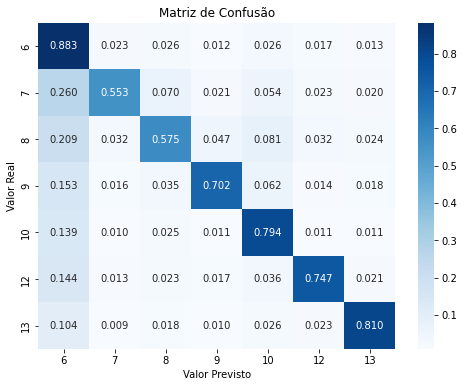

Função MatrizConfusao concluída!
Matriz de Confusão para:
[[3272  185   26  344  434  251  213]
 [  93 1791    8  170  234  107   79]
 [ 117  130 1051  281  359  147  120]
 [  54   71   16 2148  258   88   85]
 [  31   27    7  125 2917   71   41]
 [  26   23    4   94  143 3011   78]
 [  20   30    2  113  142  113 3860]]


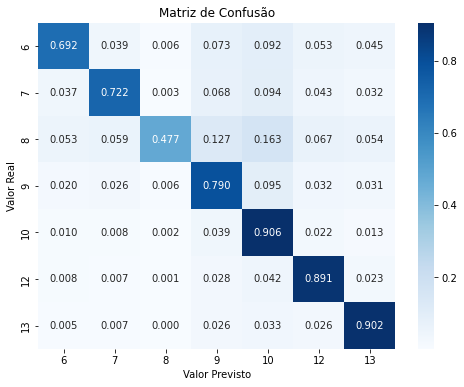

Função MatrizConfusao concluída!


In [17]:
def MatrizConfusao(YTEST, YPRED, CLASSES):
    # Computa a matriz de confusão
    matriz_confusao = confusion_matrix(YTEST, YPRED)

    # Imprime a matriz de confusão
    print(f"Matriz de Confusão para:")
    print(matriz_confusao)

    # Calcula a soma de cada linha da matriz de confusão
    sum_by_class = np.sum(matriz_confusao, axis=1)

    # Normaliza a matriz de confusão
    matriz_confusao_normalized = matriz_confusao / sum_by_class[:, np.newaxis]

    # Plota a matriz de confusão normalizada
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusao_normalized, annot=True, fmt=".3f", 
                cmap="Blues", xticklabels=CLASSES, yticklabels=CLASSES)
    plt.title(f"Matriz de Confusão")
    plt.xlabel("Valor Previsto")
    plt.ylabel("Valor Real")
    plt.savefig(f"MatrizConfusao.png", facecolor='white')
    plt.show()
    
    print("Função MatrizConfusao concluída!")
    
classes = ['6','7','8','9','10','12','13']
MatrizConfusao(y_test.iloc[:, 0], y_pred_series1, classes)
MatrizConfusao(y_test.iloc[:, 1], y_pred_series2, classes)

In [18]:
# Gera e imprime o relatório de classificação, que inclui métricas como precisão, recall e F1-score
relatorio_classificacao = classification_report(y_test.iloc[:, 0], y_pred_series1)
print("\nRelatório de Classificação DFS:")
print(relatorio_classificacao)

# Gera e imprime o relatório de classificação, que inclui métricas como precisão, recall e F1-score
relatorio_classificacao = classification_report(y_test.iloc[:, 1], y_pred_series2)
print("\nRelatório de Classificação IMP:")
print(relatorio_classificacao)



Relatório de Classificação DFS:
              precision    recall  f1-score   support

         6.0       0.62      0.88      0.73      5381
         7.0       0.82      0.55      0.66      2881
         8.0       0.67      0.58      0.62      2302
         9.0       0.85      0.70      0.77      2945
        10.0       0.76      0.79      0.78      3456
        12.0       0.85      0.75      0.79      2877
        13.0       0.89      0.81      0.85      3168

    accuracy                           0.75     23010
   macro avg       0.78      0.72      0.74     23010
weighted avg       0.77      0.75      0.75     23010


Relatório de Classificação IMP:
              precision    recall  f1-score   support

         6.0       0.91      0.69      0.78      4725
         7.0       0.79      0.72      0.76      2482
         8.0       0.94      0.48      0.63      2205
         9.0       0.66      0.79      0.72      2720
        10.0       0.65      0.91      0.76      3219
        12.0

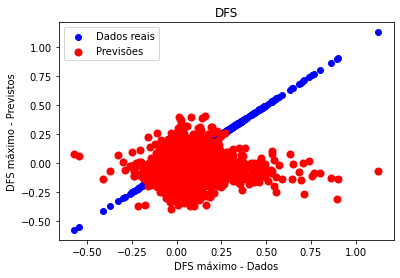

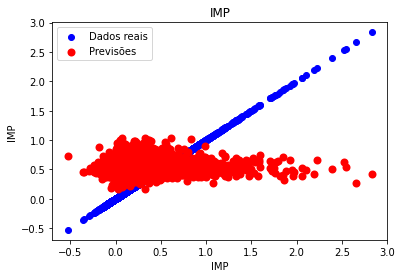

In [19]:
# Plotagem dos dados reais
plt.scatter(X_test.iloc[:, 21:28].max(axis=1), y_test.iloc[:, 2], color='blue', label='Dados reais')

# Plotagem das previsões
plt.scatter(X_test.iloc[:, 21:28].max(axis=1), y_pred3, color='red', linewidth=2, label='Previsões')

plt.xlabel('DFS máximo - Dados')
plt.ylabel('DFS máximo - Previstos')
plt.title('DFS')
plt.legend()
plt.show()

# Plotagem dos dados reais
plt.scatter(X_test.iloc[:, 28:35].max(axis=1), y_test.iloc[:, 3], color='blue', label='Dados reais')

# Plotagem das previsões
plt.scatter(X_test.iloc[:, 28:35].max(axis=1), y_pred4, color='red', linewidth=2, label='Previsões')

plt.xlabel('IMP')
plt.ylabel('IMP')
plt.title('IMP')
plt.legend()
plt.show()


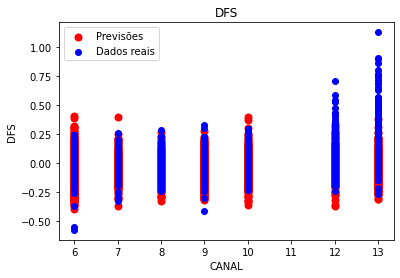

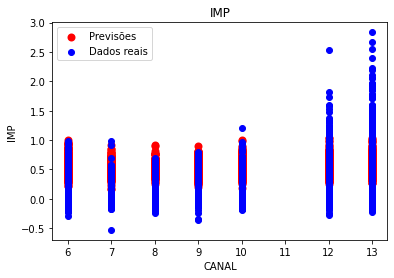

In [20]:
# Plotagem das previsões
plt.scatter(y_pred, y_pred3, color='red', linewidth=2, label='Previsões')

# Plotagem dos dados reais
plt.scatter(y_test.iloc[:, 0], X_test.iloc[:, 21:28].max(axis=1), color='blue', label='Dados reais')

plt.xlabel('CANAL')
plt.ylabel('DFS')
plt.title('DFS')
plt.legend()
plt.show()


# Plotagem das previsões
plt.scatter(y_pred2, y_pred4, color='red', linewidth=2, label='Previsões')

# Plotagem dos dados reais
plt.scatter(y_test.iloc[:, 1], X_test.iloc[:, 28:35].max(axis=1), color='blue', label='Dados reais')

plt.xlabel('CANAL')
plt.ylabel('IMP')
plt.title('IMP')
plt.legend()
plt.show()


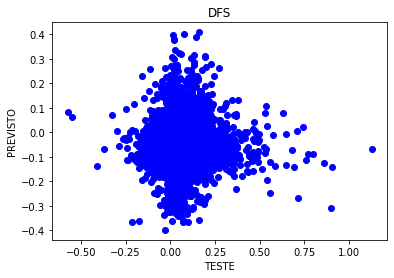

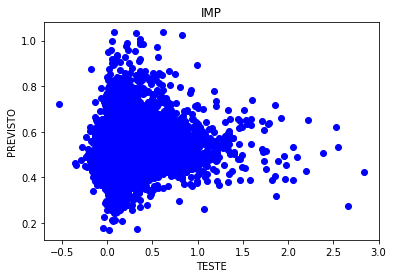

In [21]:
# Plotagem dos dados reais
plt.scatter(X_test.iloc[:, 21:28].max(axis=1), y_pred3, color='blue', label='DFS')

# Plotagem das previsões
#plt.scatter(y_pred[:, 0], y_test.iloc[:, 2], color='red', linewidth=2, label='Previsões - y_pred')

plt.xlabel('TESTE')
plt.ylabel('PREVISTO')
plt.title('DFS')
#plt.legend()
plt.show()

# Plotagem dos dados reais
plt.scatter(X_test.iloc[:, 28:35].max(axis=1), y_pred4, color='blue', label='IMP')

# Plotagem das previsões
#plt.scatter(y_pred[:, 1], y_test.iloc[:, 3], color='red', linewidth=2, label='Previsões - y_pred')

plt.xlabel('TESTE')
plt.ylabel('PREVISTO')
plt.title('IMP')
#plt.legend()
plt.show()


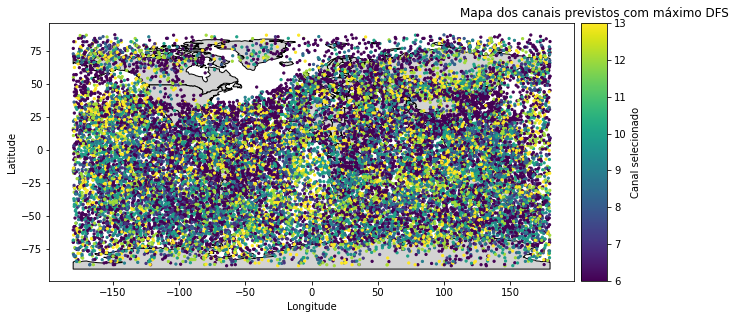

In [22]:
latitude = X_test['lat']
longitude = X_test['lon']
selecchan =  y_pred

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj = np.where(longitude > 180, longitude - 360, longitude)

# Criando um GeoDataFrame com base nos dados ajustados
gdf = gpd.GeoDataFrame(selecchan, geometry=gpd.points_from_xy(longitude_adj, latitude), crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, column=selecchan, cmap='viridis', markersize=5, legend=True, cax=cax)
scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')
cax.set_ylabel('Canal selecionado')

plt.title('Mapa dos canais previstos com máximo DFS')
plt.show()

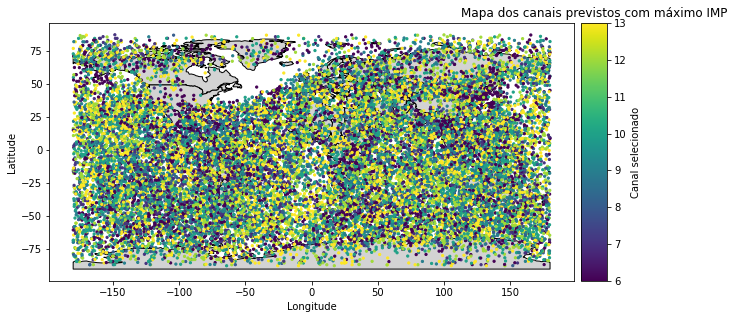

In [23]:
latitude = X_test['lat']
longitude = X_test['lon']
selecchan =  y_pred2

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj = np.where(longitude > 180, longitude - 360, longitude)

# Criando um GeoDataFrame com base nos dados ajustados
gdf = gpd.GeoDataFrame(selecchan, geometry=gpd.points_from_xy(longitude_adj, latitude), crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, column=selecchan, cmap='viridis', markersize=5, legend=True, cax=cax)
scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')
cax.set_ylabel('Canal selecionado')

plt.title('Mapa dos canais previstos com máximo IMP')
plt.show()

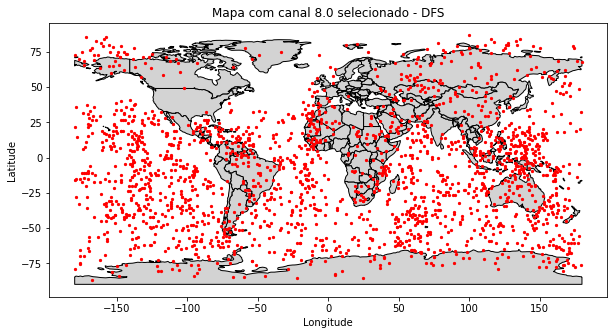

In [24]:
latitude = X_test['lat']
longitude = X_test['lon']
selecchan = y_pred  # Assuming y_pred contains the values you want to plot

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj = np.where(longitude > 180, longitude - 360, longitude)

# Filtrando os dados com base na condição selecchan == 8.0
filtered_latitude = latitude[selecchan == 8.0]
filtered_longitude_adj = longitude_adj[selecchan == 8.0]

# Criando um GeoDataFrame com base nos dados filtrados
geometry = gpd.points_from_xy(filtered_longitude_adj, filtered_latitude)
gdf = gpd.GeoDataFrame(geometry=geometry, crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, color='red', markersize=5)  # Colorindo os pontos filtrados de vermelho

scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')

plt.title('Mapa com canal 8.0 selecionado - DFS')
plt.show()


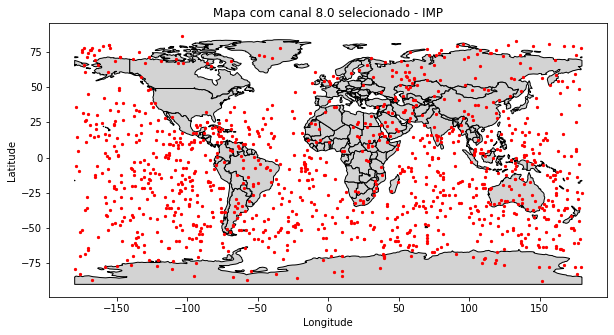

In [25]:
latitude = X_test['lat']
longitude = X_test['lon']
selecchan = y_pred2  # Assuming y_pred contains the values you want to plot

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj2 = np.where(longitude > 180, longitude - 360, longitude)

# Filtrando os dados com base na condição selecchan == 8.0
filtered_latitude2 = latitude[selecchan == 8.0]
filtered_longitude_adj2 = longitude_adj2[selecchan == 8.0]

# Criando um GeoDataFrame com base nos dados filtrados
geometry = gpd.points_from_xy(filtered_longitude_adj2, filtered_latitude2)
gdf = gpd.GeoDataFrame(geometry=geometry, crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, color='red', markersize=5)  # Colorindo os pontos filtrados de vermelho

scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')

plt.title('Mapa com canal 8.0 selecionado - IMP')
plt.show()


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


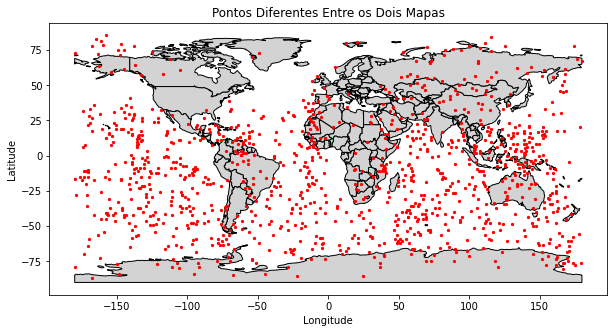

In [26]:
# Carregue os dados do primeiro mapa
gdf1 = gpd.GeoDataFrame(geometry=gpd.points_from_xy(filtered_longitude_adj, filtered_latitude), crs='EPSG:4326')

# Carregue os dados do segundo mapa
gdf2 = gpd.GeoDataFrame(geometry=gpd.points_from_xy(filtered_longitude_adj2, filtered_latitude2), crs='EPSG:4326')

# Encontre a diferença entre os GeoDataFrames
difference = gdf1.geometry.difference(gdf2.geometry)

# Crie um novo GeoDataFrame com os pontos resultantes da diferença
result = gpd.GeoDataFrame(geometry=difference, crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotando os pontos resultantes da diferença
result.plot(ax=ax, color='red', markersize=5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.title('Pontos Diferentes Entre os Dois Mapas')
plt.show()


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


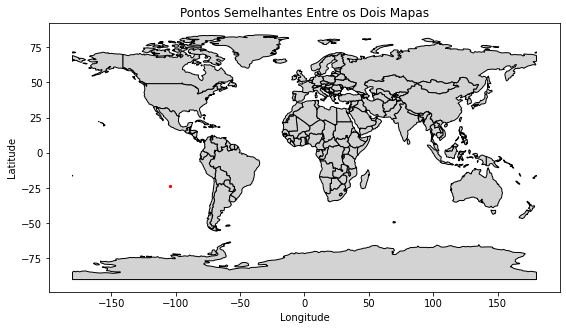

In [27]:
# Encontre a interseção entre os GeoDataFrames
intersection = gdf1.geometry.intersection(gdf2.geometry)

# Crie um novo GeoDataFrame com os pontos resultantes da interseção
result = gpd.GeoDataFrame(geometry=intersection, crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotando os pontos resultantes da interseção
result.plot(ax=ax, color='red', markersize=5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.title('Pontos Semelhantes Entre os Dois Mapas')
plt.show()

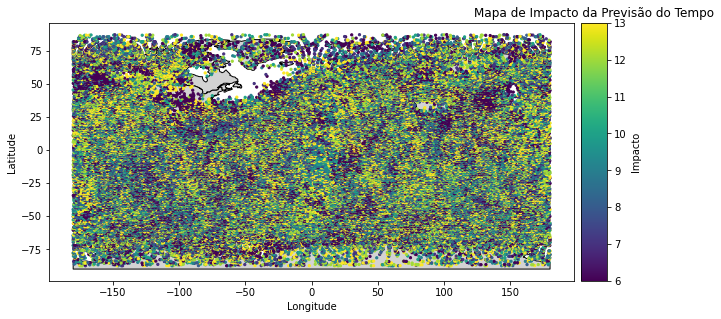

In [28]:
latitude = df_pivot2['lat']
longitude = df_pivot2['lon']
selecchan =  df_pivot2['canal_maior_imp']

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj = np.where(longitude > 180, longitude - 360, longitude)

# Criando um GeoDataFrame com base nos dados ajustados
gdf = gpd.GeoDataFrame(selecchan, geometry=gpd.points_from_xy(longitude_adj, latitude), crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, column='canal_maior_imp', cmap='viridis', markersize=5, legend=True, cax=cax)
scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')
cax.set_ylabel('Impacto')

plt.title('Mapa de Impacto da Previsão do Tempo')
plt.show()